Supervised ML :

Diabetes Prediction using Decision tree Algorithm

A Supervised ML is nothing but which consists of features and labels or consists of dependent and independent variables.There are various supervised ML Algorithms such as KNN Classifier, Linear Regression ,Decision-tree classifier,etc out of which we are using Decision-tree classifier for predicting the patient has diabetes or not.

The dataset consists of various features and label the outcome of the model and data is positive or negative that is a person has diabetes or not.


Step 1: Importing all neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import files  # loading the dataset
uploaded=files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [3]:
df=pd.read_csv('diabetes_data_upload.csv')   # reading the csv file from loaded dataset

Step 2: Data Cleaning and Exploratory Data Analysis (EDA)

In [4]:
df.head()    # getting the initial rows and columns of data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
df.tail()    #getting the last rows and columns of data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [6]:
df.shape   # getting the shape of data

(520, 17)

In [7]:
df.info()    # getting the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [8]:
df.describe  # getting the description of data

<bound method NDFrame.describe of      Age  Gender Polyuria  ... Alopecia Obesity     class
0     40    Male       No  ...      Yes     Yes  Positive
1     58    Male       No  ...      Yes      No  Positive
2     41    Male      Yes  ...      Yes      No  Positive
3     45    Male       No  ...       No      No  Positive
4     60    Male      Yes  ...      Yes     Yes  Positive
..   ...     ...      ...  ...      ...     ...       ...
515   39  Female      Yes  ...       No      No  Positive
516   48  Female      Yes  ...       No      No  Positive
517   58  Female      Yes  ...       No     Yes  Positive
518   32  Female       No  ...      Yes      No  Negative
519   42    Male       No  ...       No      No  Negative

[520 rows x 17 columns]>

In [9]:
df.isnull().sum()   # checking for outliers in data 

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [10]:
df.dtypes    # checking the datatypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


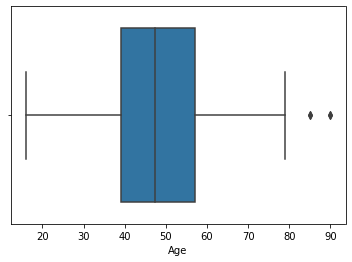

In [11]:
sns.boxplot(df['Age'])   # checking with boxplot for AGE if any outlier is there or not using seaborn

 From the above plot , we can see that there are 2 outliers in Age column which we have to remove.

In [12]:
Age=df['Age']  # checking and making age column free from outliers
print(Age)

0      40
1      58
2      41
3      45
4      60
       ..
515    39
516    48
517    58
518    32
519    42
Name: Age, Length: 520, dtype: int64


In [14]:
class_count_p,class_count_n=df['class'].value_counts()  # checking for class values for how many are positive and how many are negative
# separate class
class_p=df[df['class']=='Positive']
class_n=df[df['class']=='Negative']
print('class Positive',class_p.shape)
print('class Negative',class_n.shape)

class Positive (320, 17)
class Negative (200, 17)


In [15]:
df.drop('Age',axis=1,inplace=True)  # dropping the age column from dataset
df

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


  Step 3: Label Encoding

In [47]:
df1=df.copy()

In [48]:
df=df1.copy()   # converting positive to 1 and negative 0
le = LabelEncoder()
for i in df.columns[1:] :
    df[i] = le.fit_transform(df[i])
df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,16
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,34
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,17
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,21
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,36


Step 4  : Splitting the dataset into train and test

In [53]:
X = df.copy()
y = X.pop('class')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Step 5 :Data Modeling- Building the Model and getting its Accuracy

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_features=0.5,max_depth=15, random_state=1)

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred_proba = dt.predict_proba(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
dt_acc = accuracy_score(y_test, dt_pred)
print(dt_acc)

0.9423076923076923


 We have trained the model and predicted the dataset on test data.we got the accuracy of 94% . so, we can see that by using Decision tree we are getting good accuracy. although, we can also try for SVM or Random Forest if we want more accuracy.